In [1]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [3]:
import pandas as pd
import getpass
from functions import connect_mysql, mysql_list

# Input User id
try:
    # password input hashed
    id = getpass.getpass("id: ") 
except Exception as ex:
    print('Error Occured : ', ex)
#Input password
try:
    # password input hashed
    pwd = getpass.getpass("password: ") 
except Exception as ex:
    print('Error Occured : ', ex)

#host for RDS connection
host = "mdsi-dsp-spr-2020.cehiwpryiego.ap-southeast-2.rds.amazonaws.com"
mydb = connect_mysql(host, id, pwd)

if mydb: 
    print("Connection Successful")

id: ········
password: ········
Connection Successful


In [4]:
from functions import mysql_list
mydb = connect_mysql(host, id, pwd)
mycursor = mydb.cursor()
mycursor.execute("SHOW DATABASES;")
# create a list of database
db_list = mysql_list(mycursor.fetchall())
print(db_list) 
# asx is the database to be used
db = "asx"

['asx', 'information_schema', 'mysql', 'performance_schema']


In [5]:
mydb = connect_mysql(host, id, pwd, db)
mycursor = mydb.cursor()
mycursor.execute("SHOW TABLES;")
tb_list = mysql_list(mycursor.fetchall())
print(tb_list)

['GDP_history_year', 'asx200', 'asx200_month', 'asx_all', 'asx_history', 'asx_s_and_p', 'australia_GDP_1960_2020_usd', 'cashrate', 'exchange_rate', 'national_net_lending', 'net_lending_borrowing', 'new_loan_commitment_value_properties_purchased', 's_and_p', 'unemployment_rate', 'vix']


In [6]:
from IPython.display import display, HTML
mydb = connect_mysql(host, id, pwd, db)

for tb in tb_list:
    df = pd.read_sql_query("SELECT * FROM %s" % (tb), con=mydb)
    print(tb)
mydb.close()

GDP_history_year
asx200
asx200_month
asx_all
asx_history
asx_s_and_p
australia_GDP_1960_2020_usd
cashrate
exchange_rate
national_net_lending
net_lending_borrowing
new_loan_commitment_value_properties_purchased
s_and_p
unemployment_rate
vix


In [7]:
# Generate dataset from MySQL Server and rename as `gdp_usd`
mydb = connect_mysql(host, id, pwd, db)
gdp_usd = pd.read_sql_query("SELECT * FROM australia_GDP_1960_2020_usd", con=mydb)
gdp_usd.columns = ['date', 'gdp_billion_usd','per_capita_usd']
gdp_usd.head()

,date,gdp_billion_usd,per_capita_usd
0,1960-03-01,25.610,0.00
1,1960-06-01,26.464,11.09
2,1960-09-01,26.580,0.90
3,1960-12-01,26.590,-0.80
4,1961-03-01,26.636,1.21


In [8]:
# Convert data type of 'date' column to date. So that the dataframe could be ordered by date in the following steps. 
gdp_usd['date'] = pd.to_datetime(gdp_usd['date'], format = '%d/%m/%Y')

In [9]:
# Briefly check dataset
gdp_usd.info()
gdp_usd.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236 entries, 0 to 235
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             236 non-null    datetime64[ns]
 1   gdp_billion_usd  236 non-null    float64       
 2   per_capita_usd   236 non-null    float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 5.7 KB


,gdp_billion_usd,per_capita_usd
count,236.000000,236.000000
mean,406.010788,18455.743445
std,375.023092,17257.055571
min,25.610000,-8.070000
25%,82.490750,6.822500
50%,289.265000,17173.774405
75%,641.382500,32224.048725
max,1339.174000,53232.656890


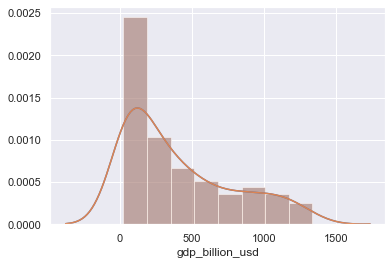

In [10]:
sns.distplot(gdp_usd['gdp_billion_usd']) 

sns.distplot(gdp_usd['gdp_billion_usd'])

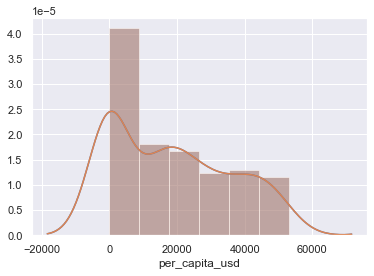

In [11]:
sns.distplot(gdp_usd['per_capita_usd']) 

sns.distplot(gdp_usd['per_capita_usd'])

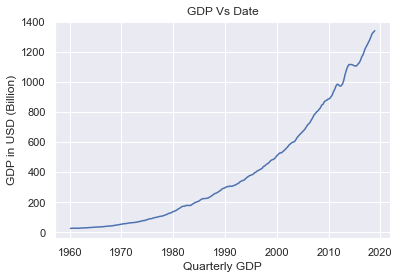

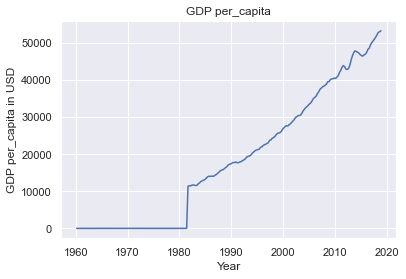

In [13]:
gdp_billion = gdp_usd['gdp_billion_usd'].tolist()
per_capita = gdp_usd['per_capita_usd'].tolist()
date = gdp_usd['date'].tolist()

plt.plot(date, gdp_billion)
plt.title('GDP Vs Date')
plt.xlabel('Quarterly GDP')
plt.ylabel('GDP in USD (Billion)')
plt.show()

plt.plot(date, per_capita)
plt.title('GDP per_capita')
plt.xlabel('Year')
plt.ylabel('GDP per_capita in USD')
plt.show()

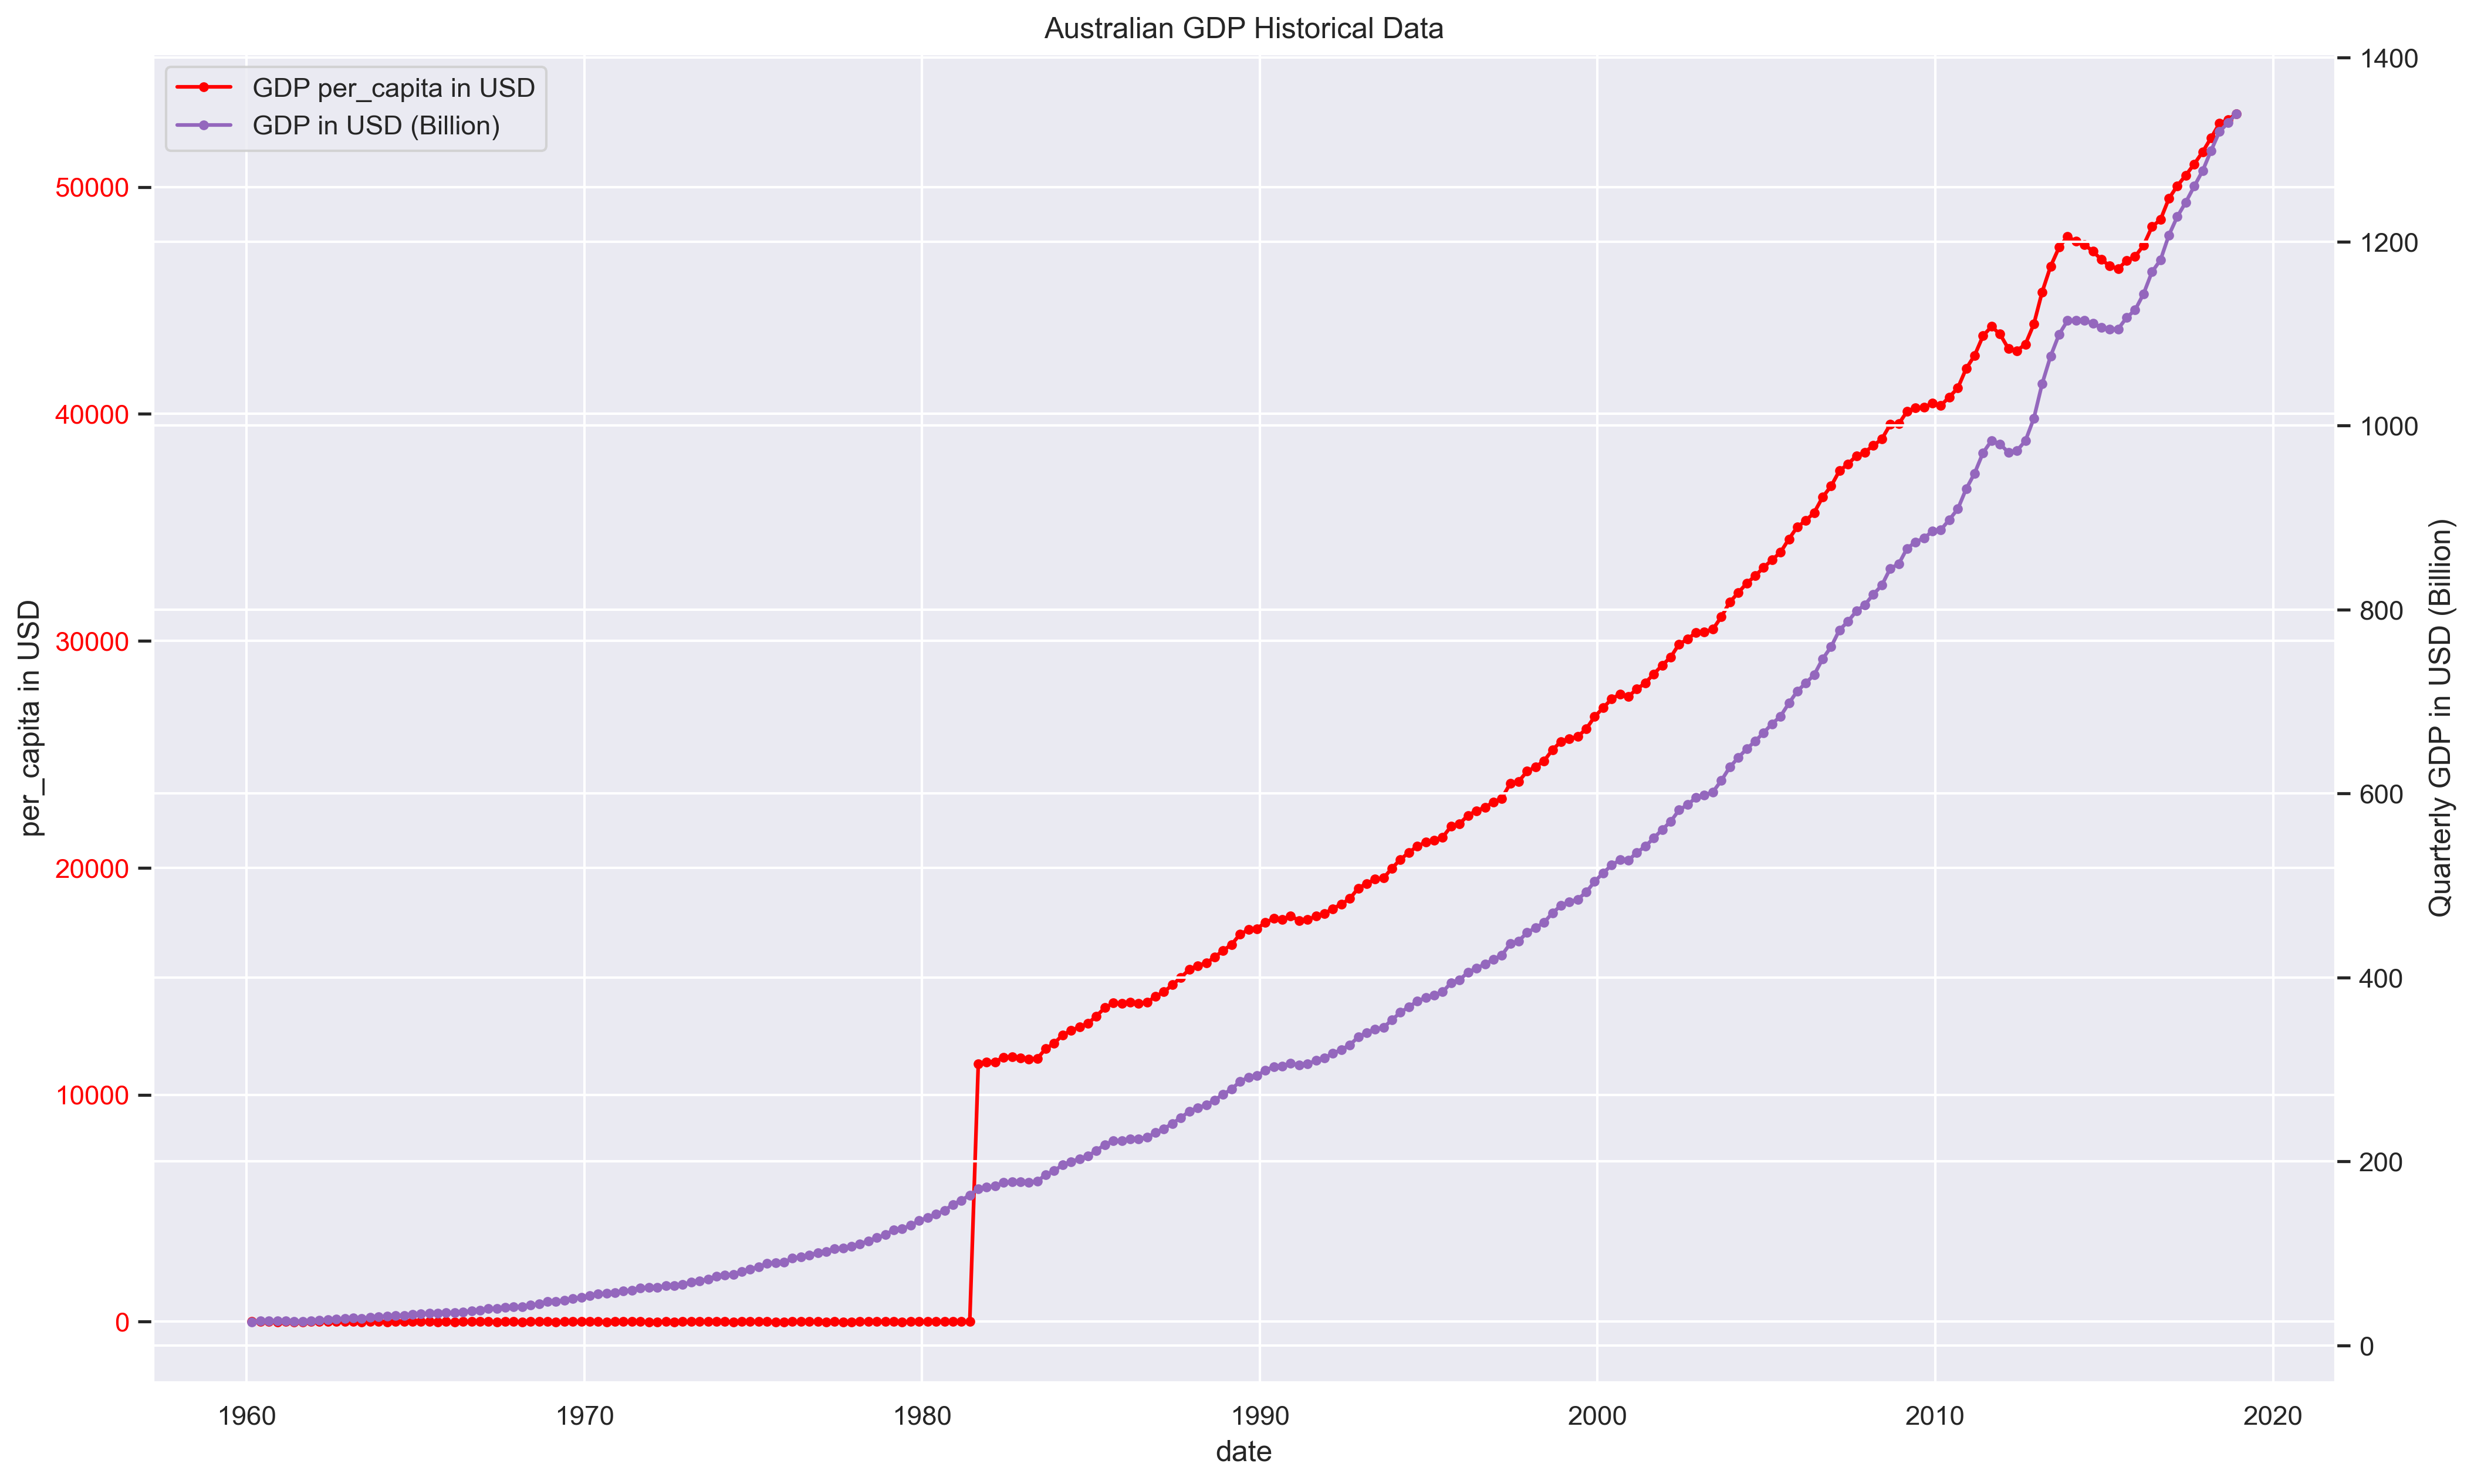

In [14]:
gdp_billion = gdp_usd['gdp_billion_usd'].tolist()
per_capita = gdp_usd['per_capita_usd'].tolist()
date = gdp_usd['date'].tolist()

fig = plt.figure(figsize = (16,10), dpi = 300)

axes1 = fig.add_subplot(111)
axes1.set_xlabel('date')
axes1.set_ylabel('per_capita in USD')
lns1 = axes1.plot(date, per_capita, marker = ".", color = "red", label = "GDP per_capita in USD")
axes1.tick_params(axis='y', labelcolor="red")
axes1.legend(loc = "upper left")

axes2 = axes1.twinx()

color = 'tab:purple'
axes2.set_ylabel('Quarterly GDP in USD (Billion)')
lns2 = axes2.plot(date, gdp_billion, marker = ".", color = color, label = 'GDP in USD (Billion)')

plt.title('Australian GDP Historical Data')

lns = lns1+lns2
labs = [l.get_label() for l in lns]
axes1.legend(lns, labs, loc="upper left")

plt.show()

In [15]:
#  Generate dataset from MySQL Server and rename as `gdp_growth`
mydb = connect_mysql(host, id, pwd, db)
gdp_growth = pd.read_sql_query("SELECT Year, GDP_growth_perc, GDP_per_cap FROM GDP_history_year", con=mydb)

gdp_growth.head()
gdp_growth.tail()
gdp_growth.drop(gdp_growth.tail(1).index,inplace=True)
gdp_growth.tail()

,Year,GDP_growth_perc,GDP_per_cap
44,2015-01-01,2.192640,56755.72171
45,2016-01-01,2.770657,49971.13146
46,2017-01-01,2.367617,54066.47127
47,2018-01-01,2.940334,57395.91947
48,2019-01-01,1.896826,54907.10191


In [16]:
# Convert data type of 'date' column to date. So that the dataframe could be ordered by date in the following steps. 
gdp_growth['Year'] = pd.to_datetime(gdp_growth['Year'], format = '%Y-%m-%d')

In [17]:
# Briefly check dataset
gdp_growth.info()
gdp_growth.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49 entries, 0 to 48
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Year             49 non-null     datetime64[ns]
 1   GDP_growth_perc  49 non-null     float64       
 2   GDP_per_cap      49 non-null     float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 1.5 KB


,GDP_growth_perc,GDP_per_cap
count,49.000000,49.000000
mean,3.094365,26270.548524
std,1.422212,19409.844776
min,-2.220458,3489.952294
25%,2.533115,11518.668520
50%,3.337959,19490.861110
75%,3.982695,40960.054490
max,5.740729,68150.107040


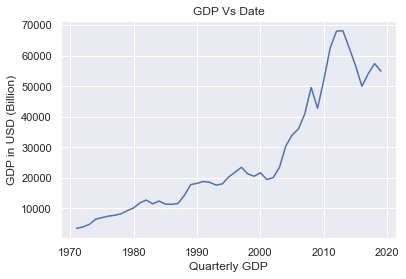

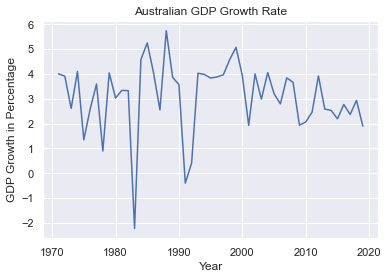

In [18]:
gdp_per_cap = gdp_growth['GDP_per_cap'].tolist()
gdp_growth_perc =  gdp_growth['GDP_growth_perc'].tolist()
year = gdp_growth['Year'].tolist()

plt.plot(year, gdp_per_cap)
plt.title('GDP Vs Date')
plt.xlabel('Quarterly GDP')
plt.ylabel('GDP in USD (Billion)')
plt.show()

plt.plot(year, gdp_growth_perc)
plt.title('Australian GDP Growth Rate')
plt.xlabel('Year')
plt.ylabel('GDP Growth in Percentage')
plt.show()

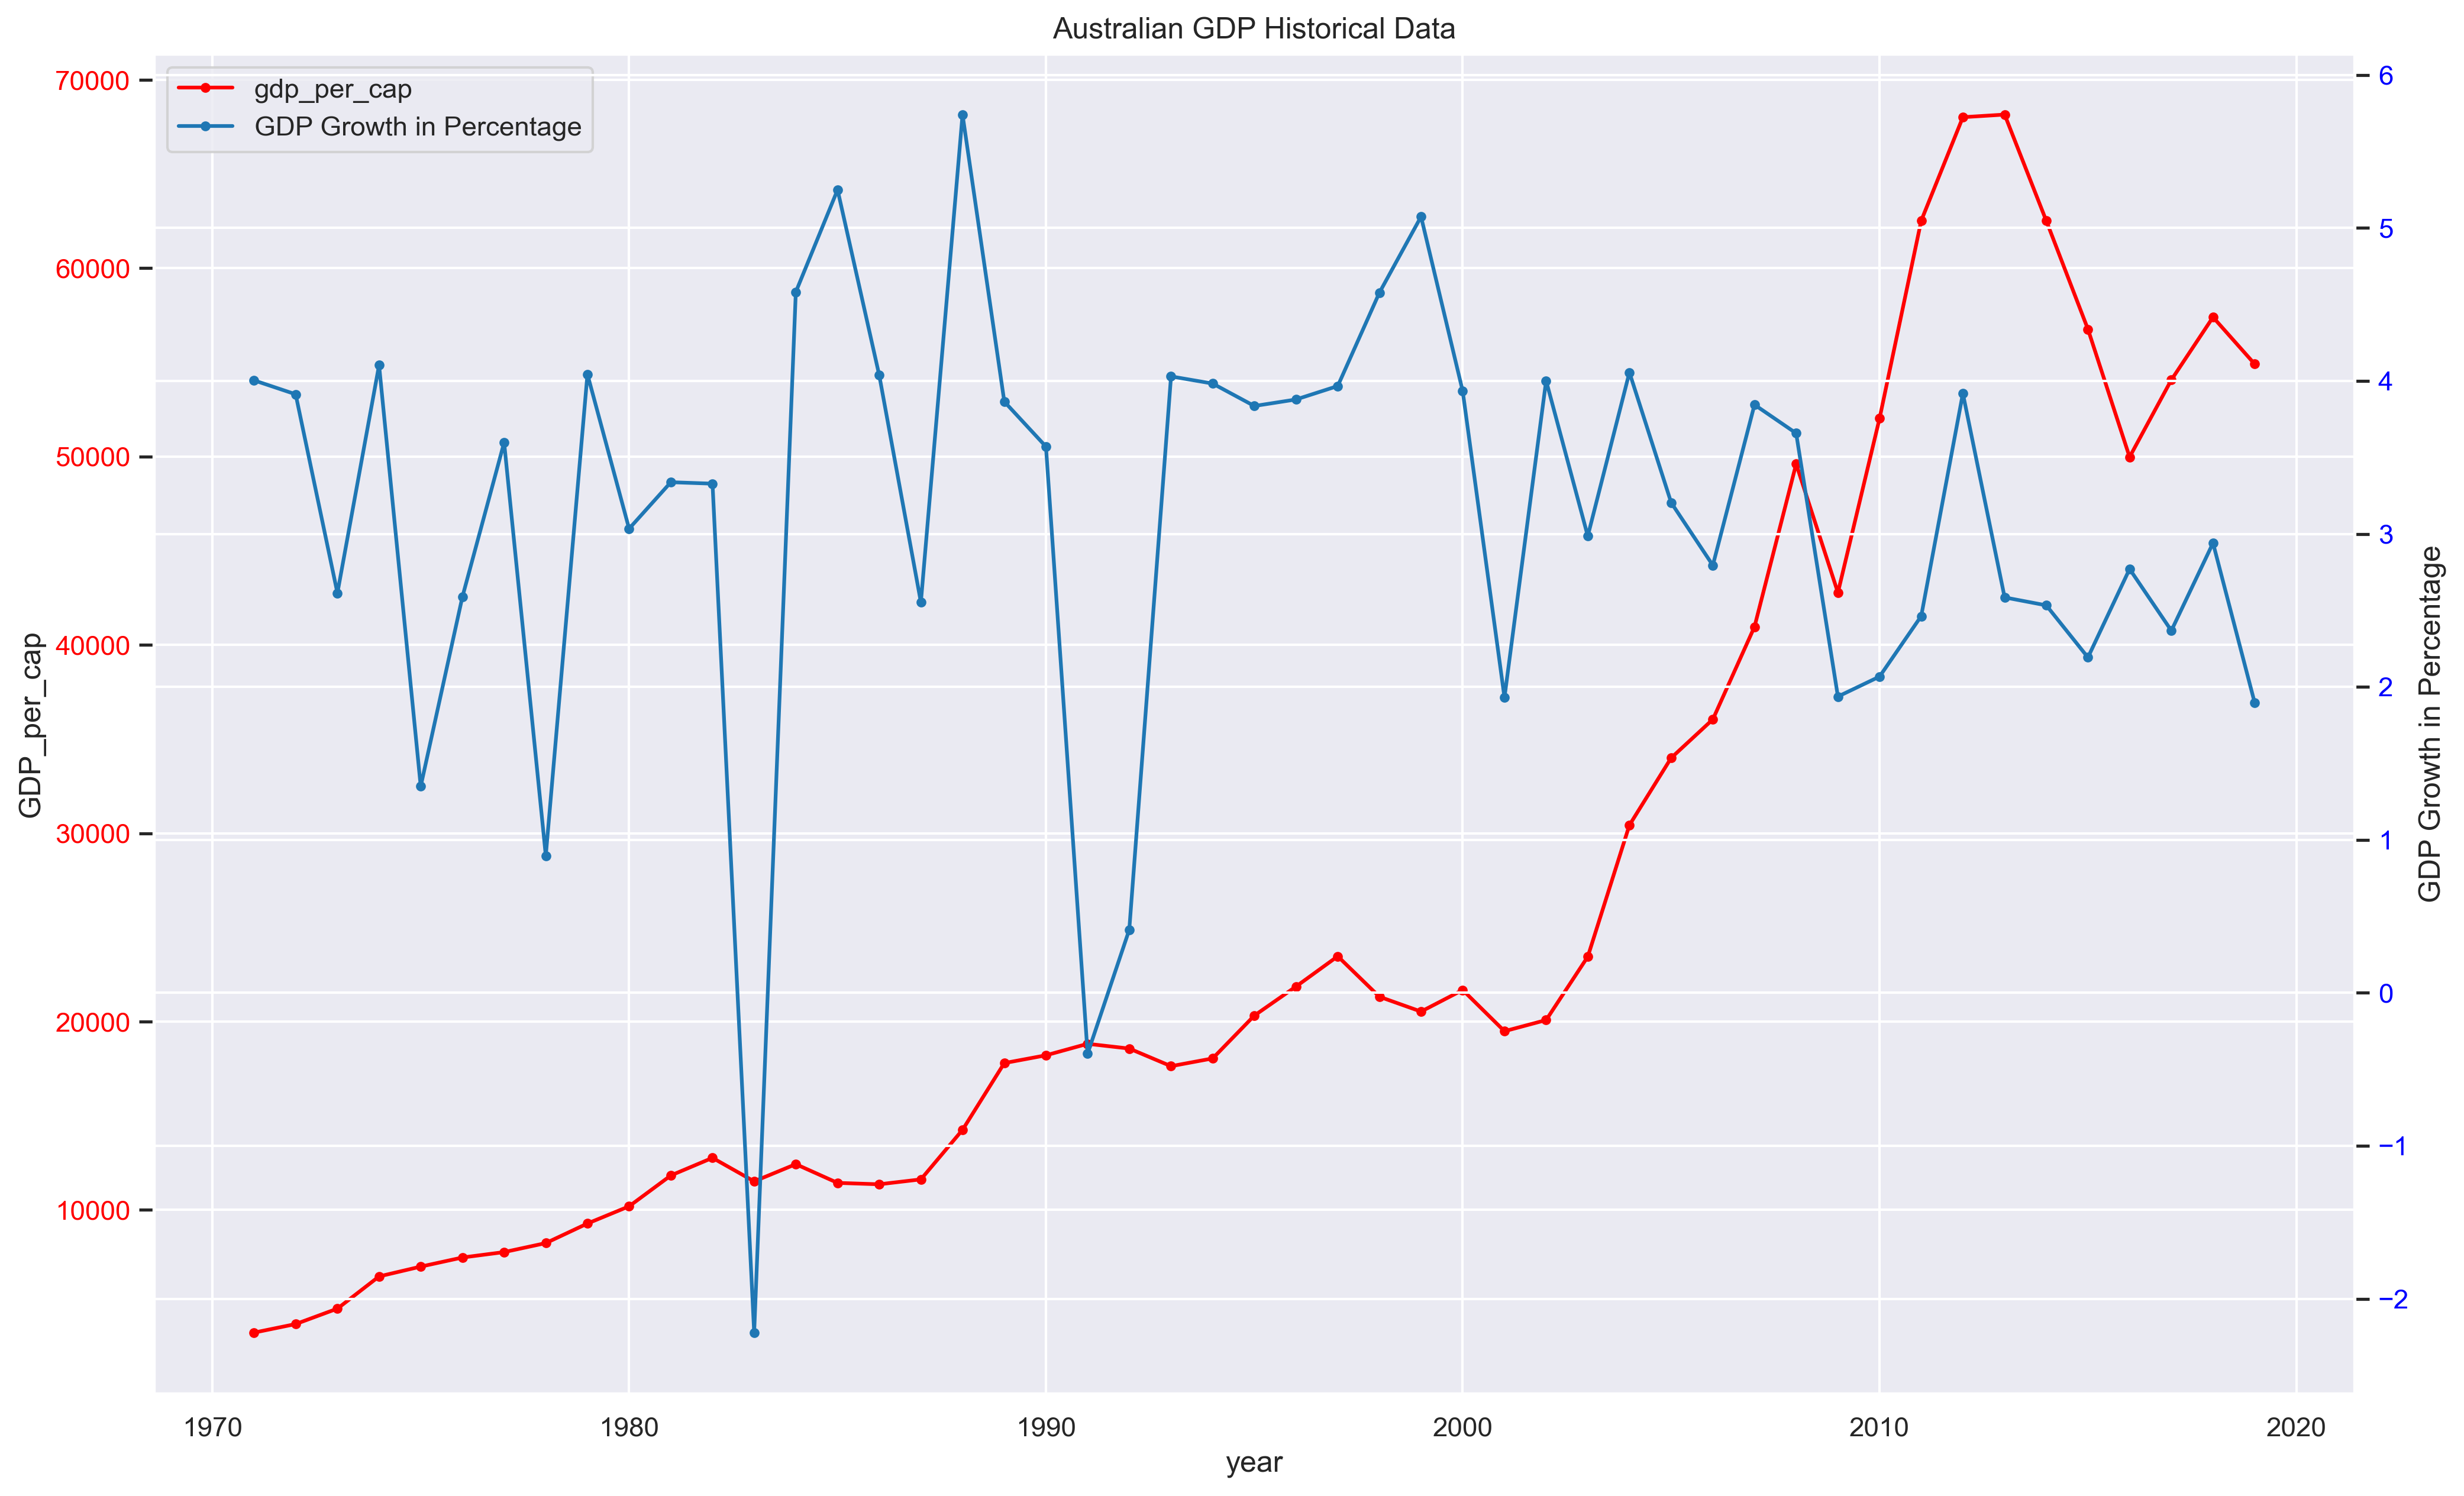

In [19]:
gdp_per_cap = gdp_growth['GDP_per_cap'].tolist()
gdp_growth_perc =  gdp_growth['GDP_growth_perc'].tolist()
year = gdp_growth['Year'].tolist()

fig = plt.figure(figsize = (16,10), dpi = 300)

axes1 = fig.add_subplot(111)
axes1.set_xlabel('year')
axes1.set_ylabel('GDP_per_cap')
lns1 = axes1.plot(year, gdp_per_cap, marker = ".", color = "red", label = "gdp_per_cap")
axes1.tick_params(axis='y', labelcolor="red")
axes1.legend(loc = "upper left")

axes2 = axes1.twinx()

color = 'tab:blue'
axes2.set_ylabel('GDP Growth in Percentage')
lns2 = axes2.plot(year, gdp_growth_perc, marker = ".", color = color, label = 'GDP Growth in Percentage')
axes2.tick_params(axis='y', labelcolor="blue")

plt.title('Australian GDP Historical Data')

lns = lns1+lns2
labs = [l.get_label() for l in lns]
axes1.legend(lns, labs, loc="upper left")

plt.show()

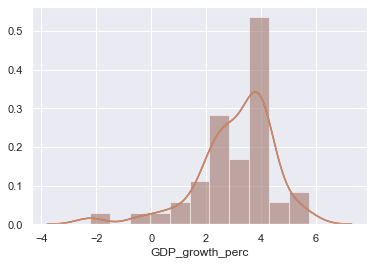

In [20]:
sns.distplot(gdp_growth['GDP_growth_perc'])

sns.distplot(gdp_growth['GDP_growth_perc'])

In [21]:
#  Generate dataset from MySQL Server and rename as `house_commitment`
mydb = connect_mysql(host, id, pwd, db)
house_commitment = pd.read_sql_query("SELECT * FROM new_loan_commitment_value_properties_purchased", con=mydb)
house_commitment.head()

,Date,Total Commitment Value of Properties Purchased,Commitment Value of Owner Occupied Properties Purchased,Commitment Value of Investment Properties Purchased,Commitment Value from First Home Buyer
0,2002-07-01,10003.6,6025.1,3978.5,1466.2
1,2002-08-01,9981.6,5986.3,3995.3,1387.3
2,2002-09-01,10073.3,6036.9,4036.5,1327.4
3,2002-10-01,10236.2,6192.7,4043.5,1338.1
4,2002-11-01,10323.2,6259.7,4063.5,1307.5


In [22]:
# Convert data type of 'date' column to date. So that the dataframe could be ordered by date in the following steps. 
house_commitment['Date'] = pd.to_datetime(house_commitment['Date'], format = '%b-%y')

In [23]:
# Briefly check dataset
house_commitment.info()
house_commitment.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217 entries, 0 to 216
Data columns (total 5 columns):
 #   Column                                                   Non-Null Count  Dtype         
---  ------                                                   --------------  -----         
 0   Date                                                     217 non-null    datetime64[ns]
 1   Total Commitment Value of Properties Purchased           217 non-null    float64       
 2   Commitment Value of Owner Occupied Properties Purchased  217 non-null    float64       
 3   Commitment Value of Investment Properties Purchased      217 non-null    float64       
 4   Commitment Value from First Home Buyer                   217 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 8.6 KB


,Total Commitment Value of Properties Purchased,Commitment Value of Owner Occupied Properties Purchased,Commitment Value of Investment Properties Purchased,Commitment Value from First Home Buyer
count,217.000000,217.000000,217.000000,217.000000
mean,16472.625346,10433.730876,6038.895853,2555.579263
std,3165.341008,2188.967457,1383.491005,766.446345
min,9981.600000,5986.300000,3978.500000,1255.900000
25%,14080.000000,8874.800000,5052.200000,2214.500000
50%,16149.700000,10302.000000,5516.100000,2439.100000
75%,19361.600000,12099.900000,6717.500000,2763.100000
max,22644.900000,14517.000000,10054.600000,5197.200000


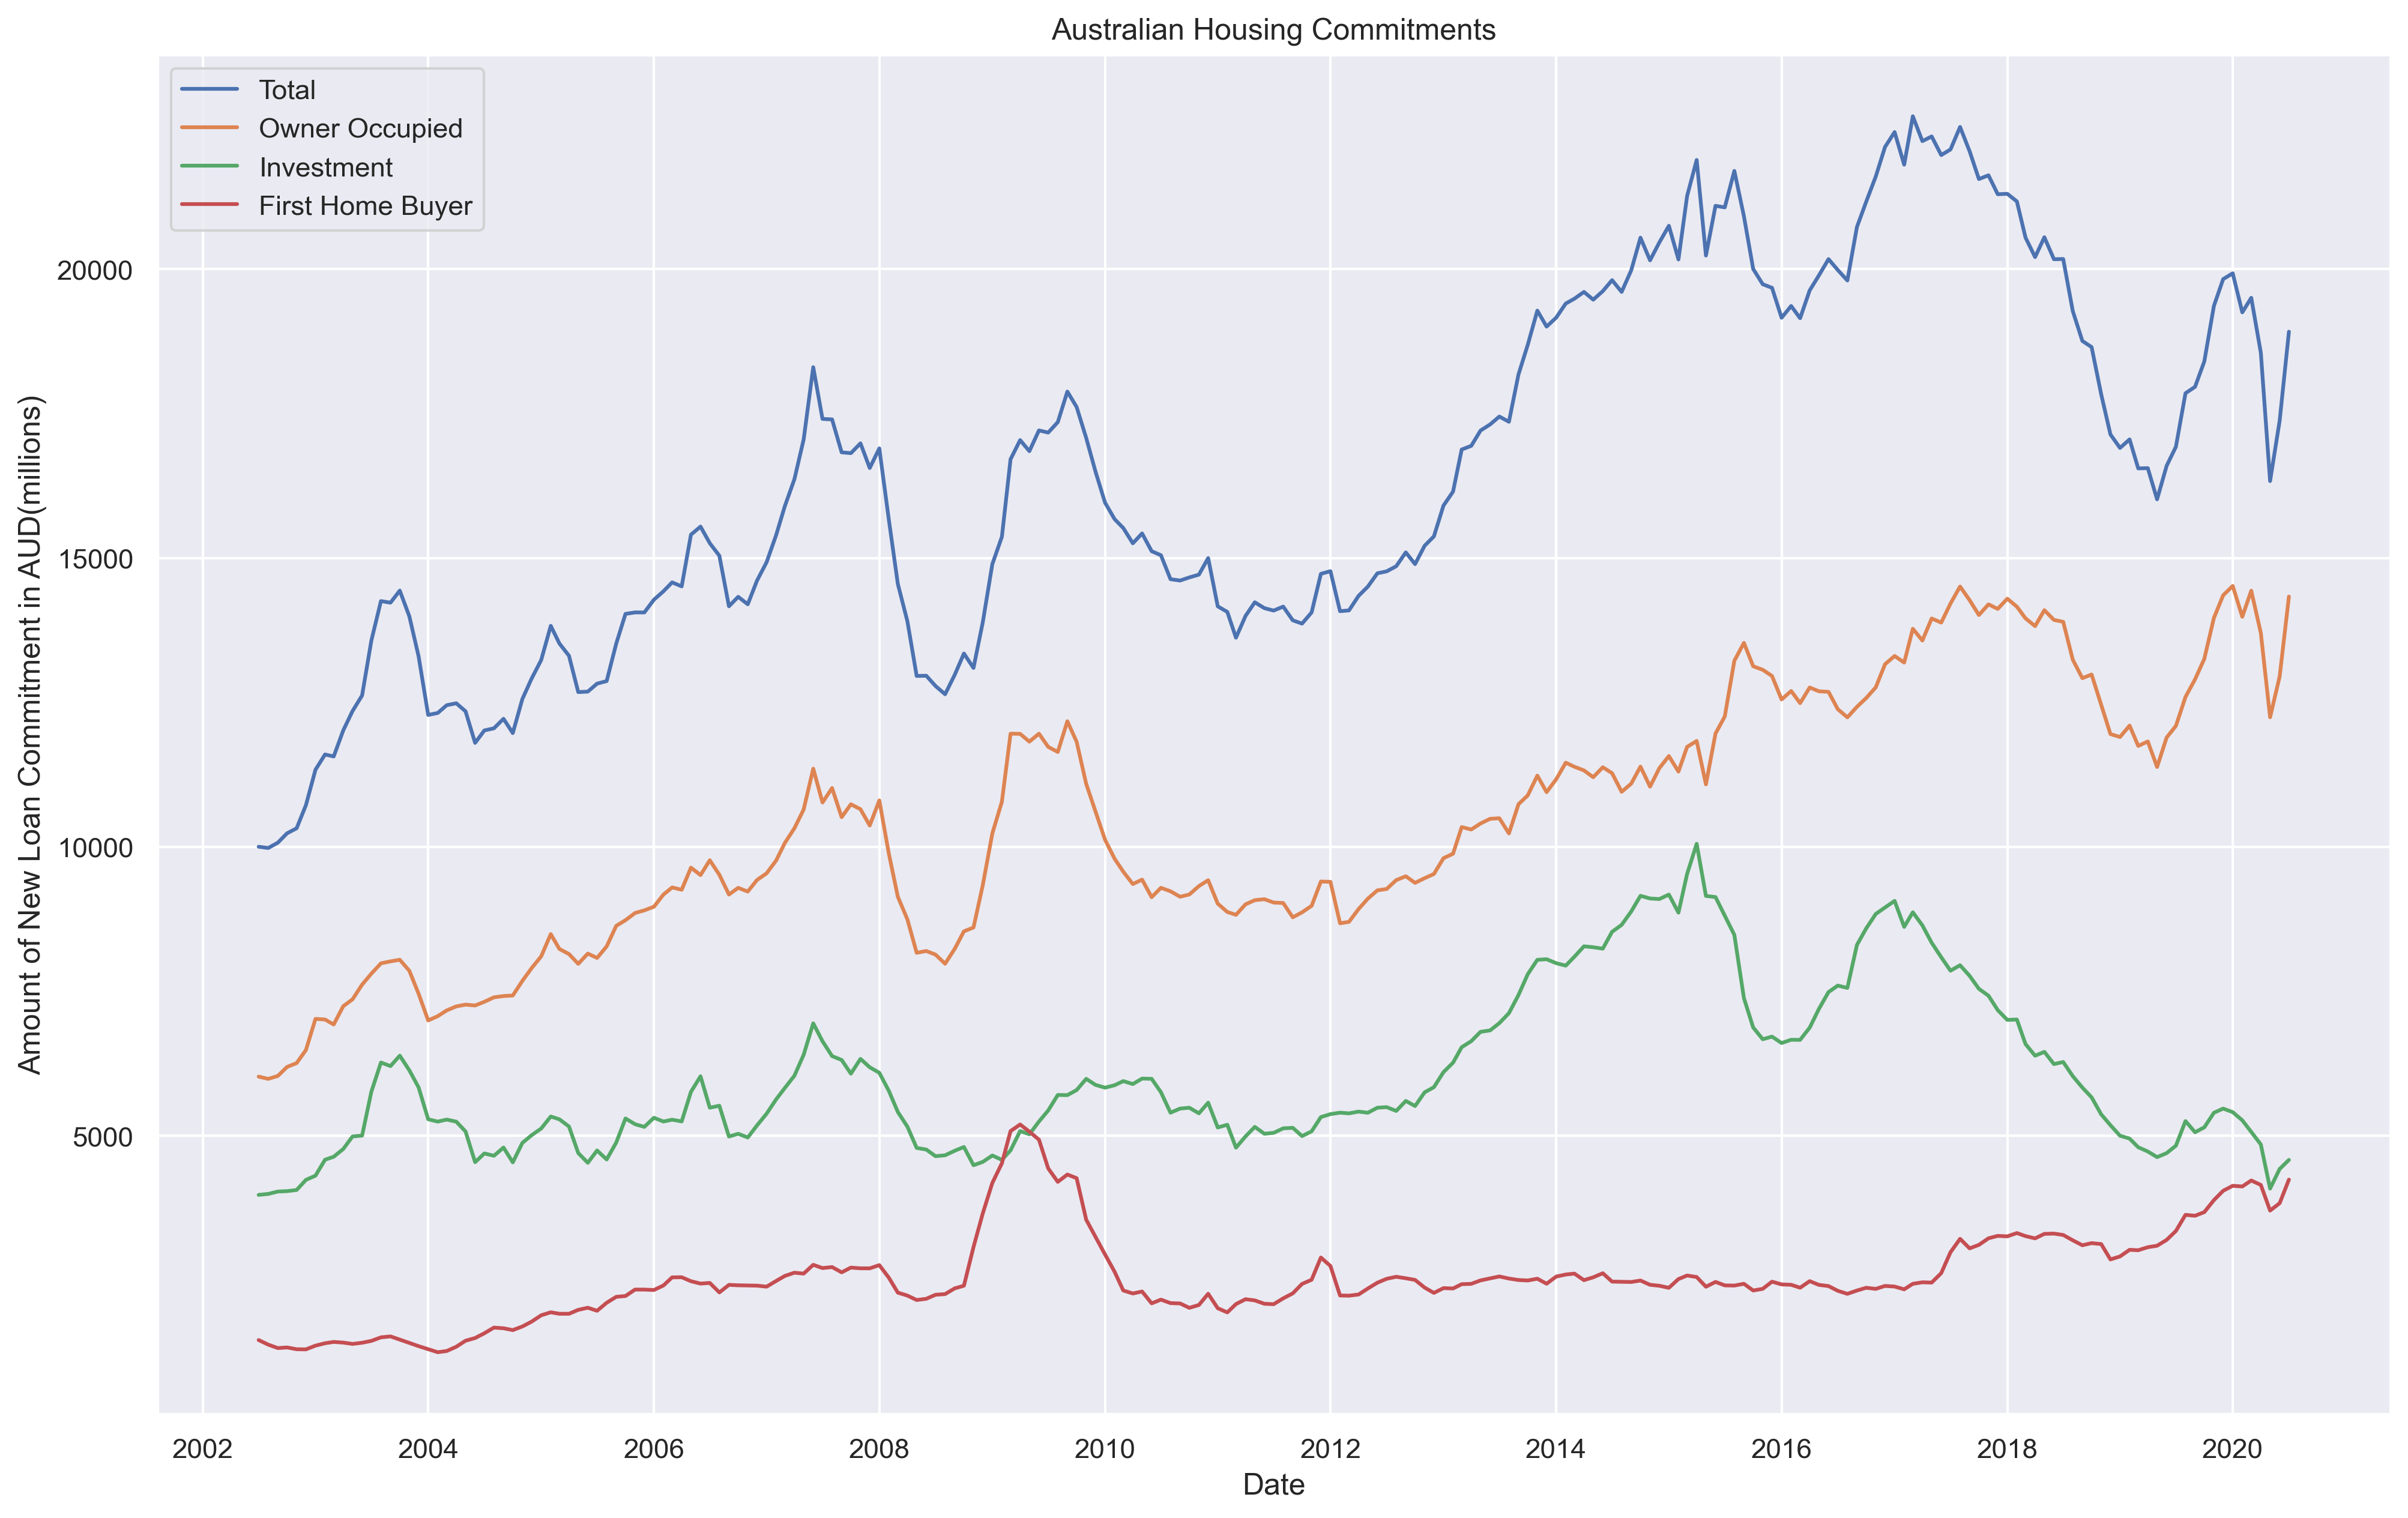

In [24]:
total = house_commitment['Total Commitment Value of Properties Purchased'].tolist()
oo = house_commitment['Commitment Value of Owner Occupied Properties Purchased'].tolist()
inv = house_commitment['Commitment Value of Investment Properties Purchased'].tolist()
fhb = house_commitment['Commitment Value from First Home Buyer'].tolist()
month = house_commitment['Date'].tolist()

fig = plt.figure(figsize = (16,10), dpi = 300)

plt.plot(month, total, label = "Total")
plt.plot(month, oo, label = "Owner Occupied")
plt.plot(month, inv, label = "Investment")
plt.plot(month, fhb, label = "First Home Buyer")
plt.legend(loc="upper left")
plt.title('Australian Housing Commitments')
plt.xlabel('Date')
plt.ylabel('Amount of New Loan Commitment in AUD(millions)')
plt.show()